# Data Visualization of Maximum and Minimum Temperature over 10 Year Period

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('data.csv')
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [20]:
df.shape

(165002, 6)

## 1. Preprocess Data

In [14]:
# Divide Temperature by 10 because it is given in 10ths of values
df['Data_Value'] = df['Data_Value']/10 

# Convert Date to pandas Date Time format
df['Date'] = pd.to_datetime(df['Date'])

# Extract day and month from Date column into new columns
# def get_day(x):
#     return x.day

# def get_month(x):
#     return x.month

df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month

# Drop Leap Dates
def get_leapdate(x):
    if not(x.month == 2 and x.day == 29):
        return True
    else:
        return False
df = df[df['Date'].apply(get_leapdate)]

df.head()

,ID,Date,Element,Data_Value,Day,Month
0,USW00094889,2014-11-12,TMAX,2.2,12,11
1,USC00208972,2009-04-29,TMIN,5.6,29,4
2,USC00200032,2008-05-26,TMAX,27.8,26,5
3,USC00205563,2005-11-11,TMAX,13.9,11,11
4,USC00200230,2014-02-27,TMAX,-10.6,27,2


 ## 2. Split Data
 **Data will be split into two time periods; 1) 2005-2014 and 2) 2015. For each time period data will be split into maximum temperatures and minimum temperatures** 

In [15]:
# Two data frames consisting of maximum and minimum temperatures from 2005 to 2014
tmax1 = df[(df['Date'] < '2015-01-01 00:00:00') & (df['Element'] == 'TMAX')]
tmin1 = df[(df['Date'] < '2015-01-01 00:00:00') & (df['Element'] == 'TMIN')]

# Two data frames consisting of maximum and minimum temperatures for the year 2015
tmax2 = df[(df['Date'] > '2014-12-31 00:00:00') & (df['Element'] == 'TMAX')]
tmin2 = df[(df['Date'] > '2014-12-31 00:00:00') & (df['Element'] == 'TMIN')]

## 3. Group Data

In [16]:
# 2005 to 2014 Data
tmax1_group = pd.DataFrame(tmax1.groupby(['Month','Day'])['Data_Value'].max())
tmin1_group = pd.DataFrame(tmin1.groupby(['Month','Day'])['Data_Value'].min())

tmax1_group = tmax1_group.reset_index()
tmax1_group['cDay'] = tmax1_group['Month'].astype(str) + '-' + tmax1_group['Day'].astype(str)
tmax1_group.set_index('cDay', inplace=True)

tmin1_group = tmin1_group.reset_index()
tmin1_group['cDay'] = tmin1_group['Month'].astype(str) + '-' + tmin1_group['Day'].astype(str)
tmin1_group.set_index('cDay', inplace=True)

# 2015 Data
tmax2_group = pd.DataFrame(tmax2.groupby(['Month','Day'])['Data_Value'].max())
tmin2_group = pd.DataFrame(tmin2.groupby(['Month','Day'])['Data_Value'].min())

tmax2_group = tmax2_group.reset_index()
tmax2_group['cDay'] = tmax2_group['Month'].astype(str) + '-' + tmax2_group['Day'].astype(str)
tmax2_group.set_index('cDay', inplace=True)

tmin2_group = tmin2_group.reset_index()
tmin2_group['cDay'] = tmin2_group['Month'].astype(str) + '-' + tmin2_group['Day'].astype(str)
tmin2_group.set_index('cDay', inplace=True)

In [17]:
# Record Break in 2015
tmax2_record = tmax2_group[tmax2_group['Data_Value'] > tmax1_group['Data_Value']]
tmin2_record = tmin2_group[tmin2_group['Data_Value'] < tmin1_group['Data_Value']]

## 4. Plot Data
**Line Plot for 2005-2014 data and Overlay Scatter Plot for 2015 Data**

In [18]:
%matplotlib notebook

<IPython.core.display.Javascript object>


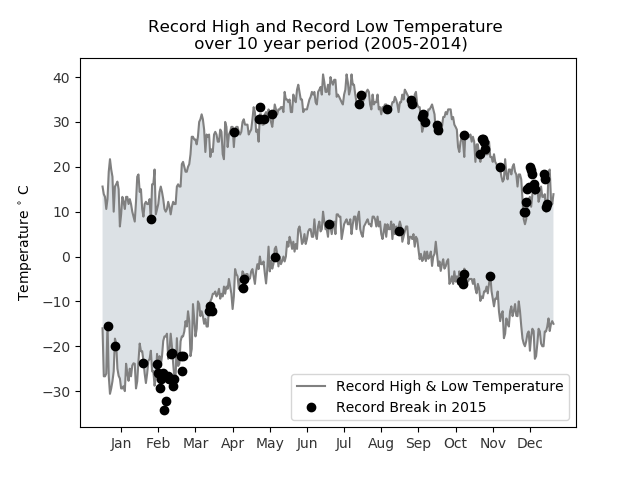

In [22]:
plt.figure()
plt.plot(tmax1_group['Data_Value'], label = 'Record High & Low Temperature', color='grey') 
plt.plot(tmin1_group['Data_Value'], color='grey')

months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
interval = int(len(tmax1_group.index.values)/12)
pos = (np.array(range(1,13))*(interval))-15 #-15 to shift the interval 15 points back so the month name is located in the mid loc
plt.xticks(pos, months, alpha=0.8)

plt.plot(tmax2_record['Data_Value'], 'o', label='Record Break in 2015', color='black')
plt.plot(tmin2_record['Data_Value'], 'o', color='black')

plt.legend()

plt.fill_between(
    range(len(tmax1_group.index.values)),
    tmax1_group['Data_Value'],
    tmin1_group['Data_Value'],
    facecolor = 'lightslategrey',
    alpha = 0.25
)

plt.title('Record High and Record Low Temperature \n over 10 year period (2005-2014)')

plt.ylabel('Temperature $^{\circ}$ C')

plt.yticks(alpha=0.8)

plt.savefig('visualization.jpg')